In [14]:
import math as m
import numpy as np
import matplotlib.pyplot as plt
from math import *

In [15]:
a = 0.0        ## Condiciones Iniciales
b = 1.0
n = 100
A = 0
B = 0.1
h = (b-a)/(n-1)
c = np.arange(a,b+(h/2),h)

In [16]:
def g(x):                  ## Defino las tres funciones en generales que pueden acompañar en la segunda derivada
    g = 12*x - 4
    return g

def p(x):
    p = 0*x
    return p

def q(x):
    q = 0*x
    return q

In [17]:
x = np.zeros(n)             ## Defino los vectores a llenar
y = np.zeros((n-2,n-2))
b = np.zeros(n-2)

In [18]:
for i in range (0,n):           ## Enmallado
    x[i] = a + i*h    

for j in range(1,n-3):          ## Columna b del sistema
    b[0] = h**2 * g(x[1]) - A*(1 - (h/2)*p(x[1]))
    b[j] = h**2 * g(x[j+1])
    b[n-3] = h**2 * g(x[n-2]) - B*(1 + (h/2)*p(x[n-2]))

In [19]:
for k in range(0,n-2):                      ## Matriz A del sistema
    for l in range (0,n-2):
        if k == l:
           y[k][l] = -2 + (h**2 * q(x[k+1]))
        elif k+1 == l:
           y[k][l] = 1 + ((h/2) * p(x[k+1]))
        elif k == l+1:
           y[k][l] = 1 - ((h/2) * p(x[k+1]))
        else:
           y[k][l] = 0.0

In [20]:
def det(y,b):     ## Aqui llamo los modulos del determinante y del solucionador
    if np.linalg.det(y) != 0:
        z = np.linalg.solve(y,b)
    else:
        print("el sistema no tiene solucion")
    return z

z = det(y,b)

In [21]:
z = z.tolist()  ## Inserto los dos valores extremos
z.insert(0,A)
z.insert(n-1,B)
z = np.asarray(z)

In [22]:
def g(t):                   ## Funcion Teorica
    g = 2*t**3 - 2*t**2 + 0.1*t
    return g

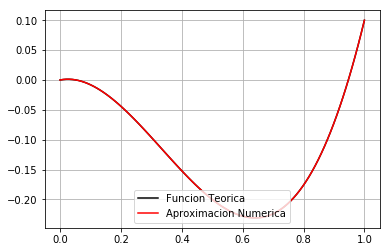

In [23]:
plt.grid()            ## COmparacion Grafica
plt.plot(x,z,'k')
plt.plot(c,g(c),'r')
plt.legend(('Funcion Teorica', 'Aproximacion Numerica'),prop = {'size':10}, loc = 'lower center')

